<a href="https://colab.research.google.com/github/hechen2020/19ma573HuixinChen/blob/master/src/hw12_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import scipy.stats as ss
import scipy.optimize as so
import scipy
import matplotlib.pyplot as plt

**Part 1: find $\mathbb{E}[\hat v_{10}^2]$ for OMC**

In [0]:
#define function h(x)
def vhat_sq_fcn(m):
  init_sum = 0 #initialize summation
  for i in range(m):
    z = np.random.normal(0,1)#generate random z
    if z < -2.:
      init_sum = init_sum + 1#sum add 1 when indicator function returns 1
  vhat = init_sum / 10#find mean of the sum
  vhatsq = vhat**2#square vhat
  return vhatsq

In [0]:
def omc_fcn(m, n):
  vec = np.zeros(n)#initialize sample
  for i in range(len(vec)):
    vec[i] = vhat_sq_fcn(m)#one vhat_sq value
    
  return vec

In [55]:
#OMC trials: m=10 for all
trial1 = omc_fcn(10, 500)
mean1 = trial1.mean()
trial2 = omc_fcn(10, 1000)
mean2 = trial2.mean()
trial3 = omc_fcn(10, 2000)
mean3 = trial3.mean()
trial4 = omc_fcn(10, 100000)
mean4 = trial4.mean()
#print(trial1)
#print(trial2)
#print(trial3)
print(mean1)
print(mean2)
print(mean3)
print(mean4)

0.0023000000000000004
0.0030200000000000005
0.0029300000000000007
0.0027601000000000006


OMC result is about 0.0027 for $\mathbb{E}[\hat v_{10}^2]$

**Part 2: find $\mathbb{E}[\hat v_{10}^2]$ for IS with $b=2$**

In [0]:
def vhat_sq_is(b, m):
  init_sum = 0 #initialize summation
  for i in range(m):
    x = np.random.normal(-b,1)#generate random x where x ~ N(-b,1)
    if x < -2.:
      init_sum = init_sum + np.exp(x * b)#sum add value when indicator function returns 1
  vhat = np.exp(b**2 / 2) * (init_sum / 10)#find mean of the sum and multiply
  vhatsq = vhat**2#square vhat
  return vhatsq

In [0]:
def is_fcn(b, m, n):
  vec = np.zeros(n)#initialize sample
  for i in range(len(vec)):
    vec[i] = vhat_sq_is(b, m)#one vhat_sq value
    
  return vec

In [58]:
#OMC trials: b=2, m=10 for all
trial1 = is_fcn(2, 10, 500)
mean1 = trial1.mean()
trial2 = is_fcn(2, 10, 1000)
mean2 = trial2.mean()
trial3 = is_fcn(2, 10, 2000)
mean3 = trial3.mean()
trial4 = is_fcn(2, 10, 100000)
mean4 = trial4.mean()
#print(trial1)
#print(trial2)
#print(trial3)
print(mean1)
print(mean2)
print(mean3)
print(mean4)

0.0005977740973219649
0.0006222955894756233
0.0006470758549943048
0.0006369570603416192


IS result is about 0.0006 for $\mathbb{E}[\hat v_{10}^2]$ for $b=2$

**Part 3: What b makes IS most efficient?**

From class notes we have the true expectation is 

$$v = N(-2) \approx 0.02275$$

We know that the MSE can be written as

$$MSE = Var + Bias^2$$

We also know that the estimator $\hat v_{10}$ is an unbiased estimator of $v$ (class notes). Thus

$$Bias(\hat v_{10} - v) = 0$$

and

$$MSE = Var(\hat v_{10}) = E[\hat v_{10}^2] - (E[\hat v_{10}])^2$$

since $\hat v_{10}$ is unbiased the expected value should be the true value, i.e.,

$$E[\hat v_{10}] = N(-2) \approx 0.02275$$

so we can rewrite MSE as

$$MSE = Var(\hat v_{10}) = E[\hat v_{10}^2] - (0.02275)^2=E[\hat v_{10}^2] - 0.000517565$$

thus to minimize MSE, we want value of $E[\hat v_{10}^2]$ to be at or close to $0.000517565$.

We can find the range for $b$ that satisfy this by numerical computations

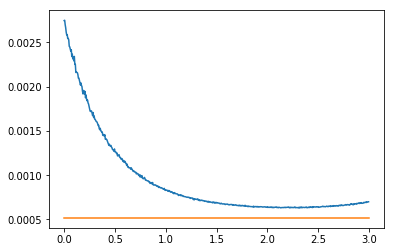

In [59]:
bvec = np.arange(0,3,0.005)
#print(b[2])
#print(len(b))
vhat = np.zeros(len(bvec))
#print(vhat)
#print(vhat[4])
for i in range (len(vhat)):
  vhat[i] = is_fcn(bvec[i], 10, 50000).mean()
vtrue = np.zeros(len(bvec))
for i in range(len(vtrue)):
  vtrue[i] = (ss.norm.cdf(-2))**2
plt.plot(bvec, vhat)
plt.plot(bvec, vtrue)

minimum at b=[[2.32]] with error of 0.0001133398690194294


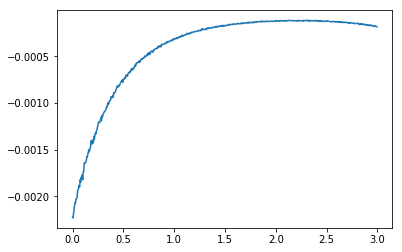

In [60]:
err = vtrue - vhat
plt.plot(bvec, vtrue-vhat)
minerr = max(err)
minerrb = bvec[np.argwhere(err == minerr)]
print('minimum at b=' + str(minerrb) + ' with error of ' + str(-minerr))

So the min value should be around $b=2$

*Try #2: minimize error*

In [0]:
def err_fcn(b,m,n):
  return np.abs(is_fcn(b,m,n).mean() - ss.norm.cdf(-2)**2)

In [62]:
b_val = so.fmin(err_fcn, 2, args = (10, 50000), disp = 0)[0]
print('MSE b value is at ' + str(b_val))

MSE b value is at 2.1500000000000004


Note: neither method above provide the exact value of b; in other words, the b-val are not deterministic

*To find $E[\hat v _{10}^2]$ by the formula*

we are looking for 

$$E[(e^{b^2/2}\frac{1}{10}\sum_{i=1}^{10}e^{x_ib}I(x_i<-2))^2]$$

which can be rewritten as

$$e^{b^2}\frac{1}{100}E[(\sum_{i=1}^{10}e^{x_ib}I(x_i<-2))^2]=e^{b^2}\frac{1}{100}E[(\sum_{i=1}^{10}e^{x_ib}I(x_i<-2))(\sum_{j=1}^{10}e^{x_jb}I(x_j<-2))]$$

Inside the expected value, there are two cases: when $i=j$ and when $i\not = j$.

When $i=j$, the expectation is

$$E[e^{2xb}I(x<-2)]$$

which can be rewritten as

$$E[e^{2xb}I(x<-2)]=\int_{-\infty}^{-2}e^{2xb}\phi^b(x)dx=\int_{-\infty}^{-2}e^{2xb}\frac{1}{\sqrt{2\pi}}e^{-\frac{(x+b)^2}{2}}dx=\frac{1}{\sqrt{2\pi}}\int_{-\infty}^{-2}e^{2xb}e^{-\frac{x^2}{2}-xb-\frac{b^2}{2}}dx=\frac{1}{\sqrt{2\pi}}\int_{-\infty}^{-2}e^{-\frac{x^2}{2}+xb-\frac{b^2}{2}}dx$$

and there are $10$ cases of this.

When $i\not= j$, the expectation is

$$E[(e^{xb}I(x<-2))^2]=(\int_{-\infty}^{-2}e^{xb}\phi^b(x)dx)^2=(\int_{-\infty}^{-2}e^{xb}\frac{1}{\sqrt{2\pi}}e^{-\frac{(x+b)^2}{2}}dx)^2=(\int_{-\infty}^{-2}\frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}-\frac{b^2}{2}}dx)^2$$

and there are $100-10 = 90$ cases of this.

Thus we have

$$e^{b^2}\frac{1}{100}E[(\sum_{i=1}^{10}e^{x_ib}I(x_i<-2))^2]=e^{b^2}\frac{1}{100}(10\frac{1}{\sqrt{2\pi}}\int_{-\infty}^{-2}e^{-\frac{x^2}{2}+xb-\frac{b^2}{2}}dx+90(\int_{-\infty}^{-2}\frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}-\frac{b^2}{2}}dx)^2)=e^{b^2}\frac{1}{10}\frac{1}{\sqrt{2\pi}}\int_{-\infty}^{-2}e^{-\frac{x^2}{2}+xb-\frac{b^2}{2}}dx+e^{b^2}\frac{9}{10}(\int_{-\infty}^{-2}\frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}-\frac{b^2}{2}}dx)^2$$

we want this to be close to $0.02275^2$

In [0]:
def integral_fcn(b):
  int1 = lambda x: (1/np.sqrt(2*np.pi)) * np.exp(- x**2/2 + x*b - b**2/2)
  intval1 = scipy.integrate.quad(int1, -np.inf, -2)[0]
  int2 = lambda x: (1/np.sqrt(2*np.pi)) * np.exp(- x**2/2 - b**2/2)
  intval2 = scipy.integrate.quad(int2, -np.inf, -2)[0]
  
  return np.exp(b**2) * ((intval1) / 10 + 9*(intval2**2) / 10)

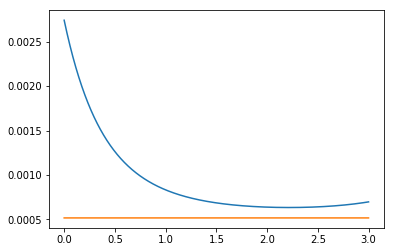

In [65]:
bvec = np.arange(0,3,0.001)
vvec = np.zeros(len(bvec))
#print(vhat)
#print(vhat[4])
for i in range (len(vvec)):
  vvec[i] = integral_fcn(bvec[i])
vreal = np.zeros(len(bvec))
for i in range(len(vreal)):
  vreal[i] = (ss.norm.cdf(-2))**2
plt.plot(bvec, vvec)
plt.plot(bvec, vreal)

minimum at b=[[2.216]] with error of 0.00011700363541083123


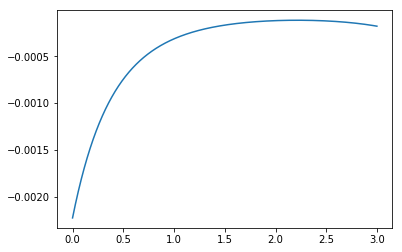

In [68]:
err = vreal - vvec
plt.plot(bvec, vreal-vvec)
minerr = max(err)
minerrb = bvec[np.argwhere(err == minerr)]
print('minimum at b=' + str(minerrb) + ' with error of ' + str(-minerr))

Thus the deterministic approach result is at about $b=2.216$, which matches previous assumptions